In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read in csv
df = pd.read_csv("./Resources/CrowdfundingData.csv")

# display the first 5 rows of the dataset
df.head()

,id,name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category
0,0,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1448690400,1450159200,False,False,food/food trucks
1,1,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1408424400,1408597200,False,True,music/rock
2,2,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1384668000,1384840800,False,False,technology/web
3,3,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1565499600,1568955600,False,False,music/rock
4,4,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1547964000,1548309600,False,False,theater/plays


# Data Cleaning

In [ ]:
# Check for missing values
df.isnull().sum()

id               0
name             0
blurb            0
goal             0
pledged          0
outcome          0
backers_count    0
country          0
currency         0
launched_at      0
deadline         0
staff_pick       0
spotlight        0
category         0
dtype: int64

In [ ]:
# check the data types of each column using the dtypes attribute.

df.dtypes

id                int64
name             object
blurb            object
goal              int64
pledged           int64
outcome          object
backers_count     int64
country          object
currency         object
launched_at       int64
deadline          int64
staff_pick         bool
spotlight          bool
category         object
dtype: object

# Data Wrangling

In [ ]:
# Convert the timestamp columns to datetime format
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
df['deadline'] = pd.to_datetime(df['deadline'], unit='s')

# Calculate the duration of each campaign in days
df['duration'] = (df['deadline'] - df['launched_at']).dt.days

# Create a new column to indicate whether a project was successful or not
df['success'] = df['outcome'] == 'successful'

# Extract the main category from the category column
df['main_category'] = df['category'].apply(lambda x: x.split('/')[0])

# Extract the month from the 'launched_at' column
df['launched_month'] = df['launched_at'].dt.month


# Data Visualization

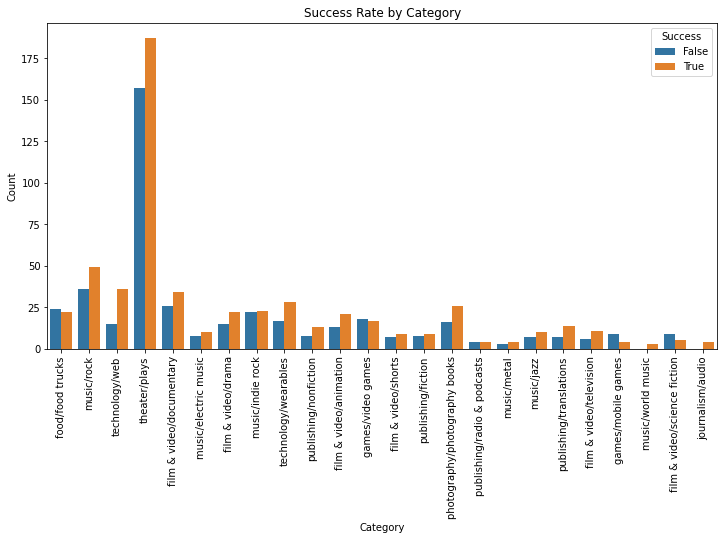

In [ ]:
# Plot the success rate by category

# Create a bar plot showing the count of successful and failed projects for each category
plt.figure(figsize=(12, 6))

# The hue parameter is used to distinguish between successful and failed projects
sns.countplot(x='category', hue='success', data=df)
plt.xticks(rotation=90)
plt.title('Success Rate by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')


# Save the figure.
plt.savefig(f"./Images/successRateByCategory.jpg")

plt.show()

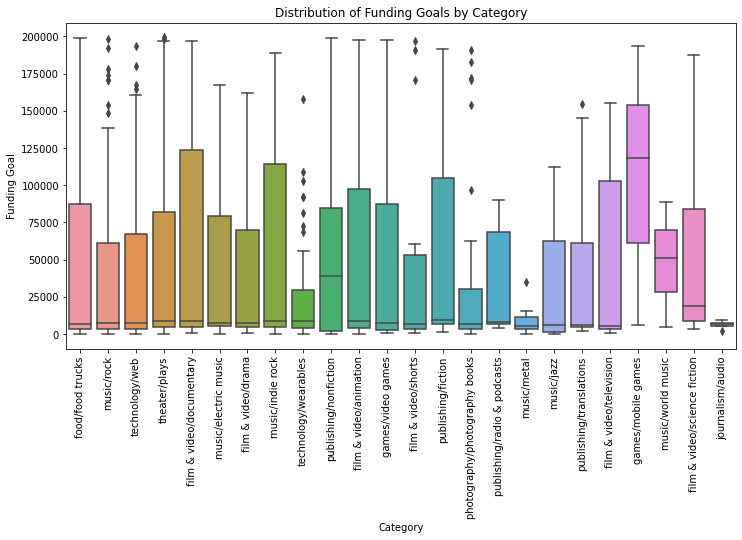

In [ ]:
# Plot the distribution of funding goals and pledged amounts by category

plt.figure(figsize=(12, 6))
# The x-axis represents the category of projects and the y-axis represents the funding goal for each project
sns.boxplot(x='category', y='goal', data=df)
# The 'rotation' argument is used to rotate the category labels on the x-axis by 90 degrees for better visibility
plt.xticks(rotation=90)
# The plot is given a title using 'plt.title' function and the x and y axes are labelled using 
# 'plt.xlabel' and 'plt.ylabel' functions, respectively.
plt.title('Distribution of Funding Goals by Category')
plt.xlabel('Category')
plt.ylabel('Funding Goal')


# Save the figure.
plt.savefig(f"./Images/FundingGoals.jpg")

plt.show()

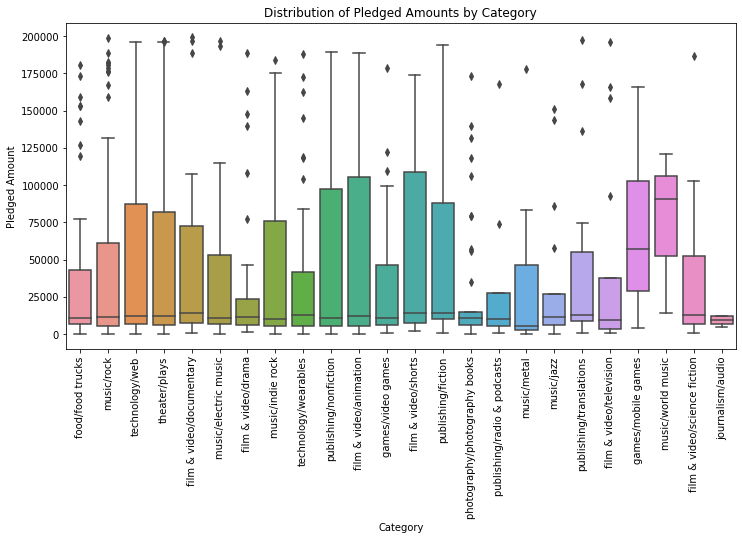

In [ ]:
# create a box plot to show the distribution of pledged amounts by category

# set figsize parameter to (12, 6) to adjust the size of the plot.
plt.figure(figsize=(12, 6))
# sns.boxplot() function from Seaborn library is used, with 'category' on the x-axis and 'pledged' on the y-axis. 
sns.boxplot(x='category', y='pledged', data=df)
# rotate x-axis labels 90 to make them more readable
plt.xticks(rotation=90)
# set the title of the plot using plt.title()
plt.title('Distribution of Pledged Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Pledged Amount')


# Save the figure.
plt.savefig(f"./Images/PledgedAmountByCategory.jpg")

plt.show()

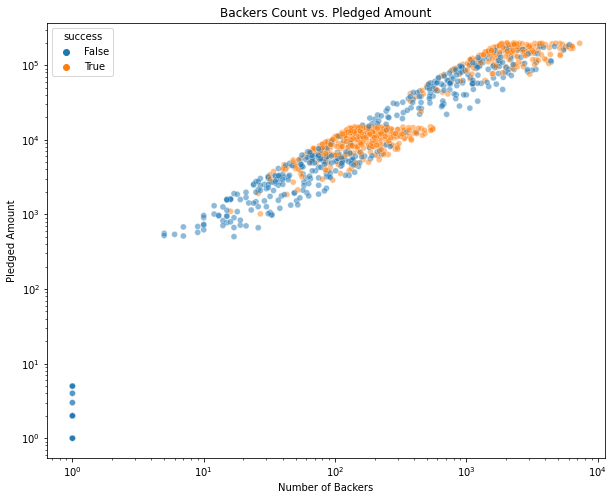

In [ ]:
# Create a scatter plot of backers count vs. pledged amount, colored by success
plt.figure(figsize=(10, 8))
sns.scatterplot(x='backers_count', y='pledged', hue='success', data=df, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Backers Count vs. Pledged Amount')
plt.xlabel('Number of Backers')
plt.ylabel('Pledged Amount')


# Save the figure.
plt.savefig(f"./Images/BackersVPledge.jpg")

plt.show()

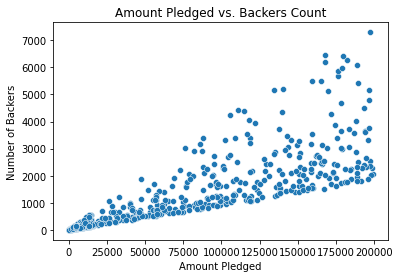

In [ ]:
# Create a scatter plot of amount pledged vs. backers count
sns.scatterplot(x='pledged', y='backers_count', data=df)
plt.title('Amount Pledged vs. Backers Count')
plt.xlabel('Amount Pledged')
plt.ylabel('Number of Backers')


# Save the figure.
plt.savefig(f"./Images/AmountPledgedVBackers.jpg")

plt.show()

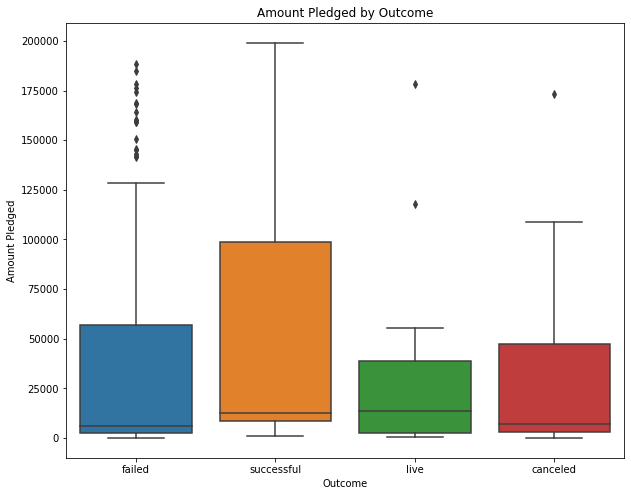

In [ ]:
# Create a box plot showing the amount pledged by outcome
plt.figure(figsize=(10, 8))
sns.boxplot(x='outcome', y='pledged', data=df)
plt.title('Amount Pledged by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Amount Pledged')


# Save the figure.
plt.savefig(f"./Images/PledgedByOutcome.jpg")

plt.show()

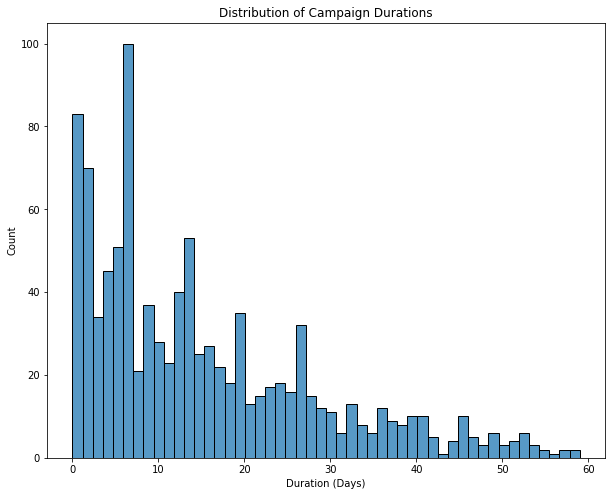

In [ ]:
# Create a histogram showing the distribution of campaign durations
plt.figure(figsize=(10, 8))
sns.histplot(x='duration', data=df, bins=50)
plt.title('Distribution of Campaign Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Count')


# Save the figure.
plt.savefig(f"./Images/DurationDistribution.jpg")

plt.show()

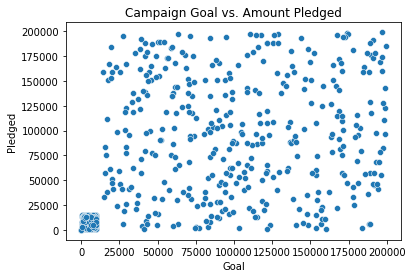

In [ ]:
# Create a scatter plot showing the relationship between the campaign goal and the amount pledged
sns.scatterplot(x='goal', y='pledged', data=df)
plt.title('Campaign Goal vs. Amount Pledged')
plt.xlabel('Goal')
plt.ylabel('Pledged')


# Save the figure.
plt.savefig(f"./Images/GoalVPledged.jpg")

plt.show()

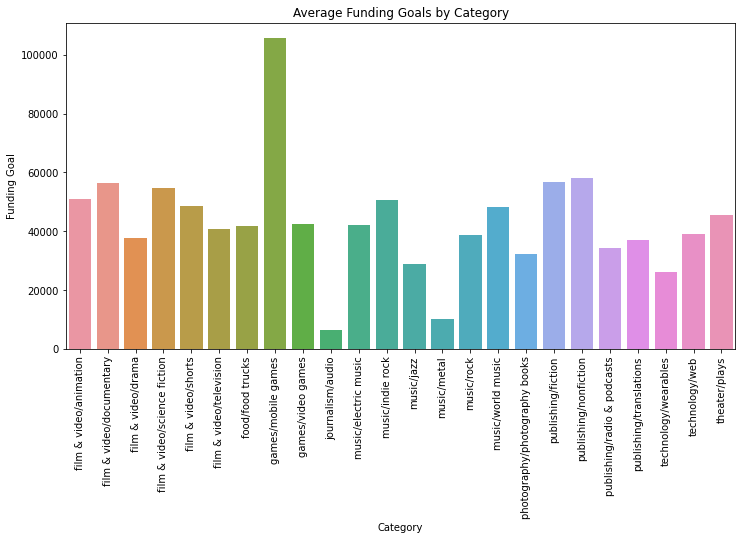

In [ ]:
# Plot the average funding goals and pledged amounts by category
category_stats = df.groupby('category')[['goal', 'pledged']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='goal', data=category_stats)
plt.xticks(rotation=90)
plt.title('Average Funding Goals by Category')
plt.xlabel('Category')
plt.ylabel('Funding Goal')


# Save the figure.
plt.savefig(f"./Images/AverageFunding.jpg")

plt.show()

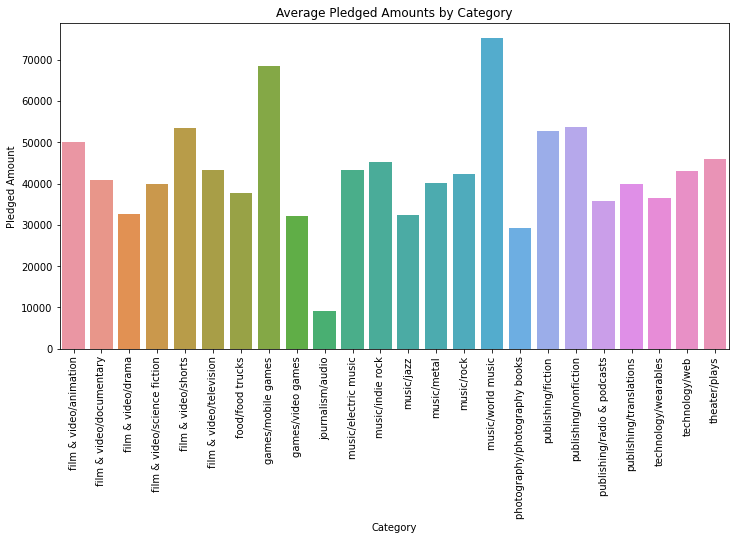

In [ ]:
# create a bar chart showing the average pledged amounts by category.

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='pledged', data=category_stats)
plt.xticks(rotation=90)
plt.title('Average Pledged Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Pledged Amount')


# Save the figure.
plt.savefig(f"./Images/AveragePledged.jpg")

plt.show()

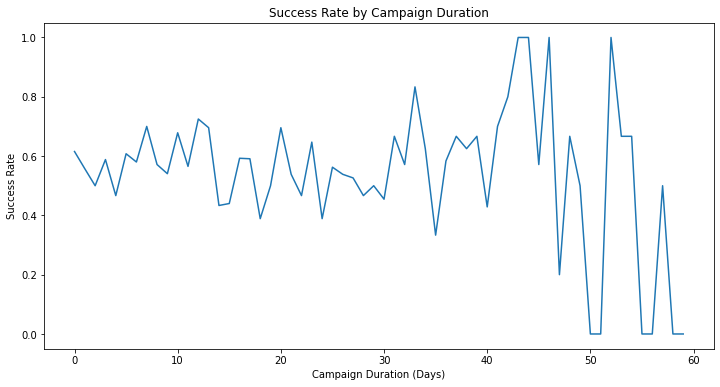

In [ ]:
# Plot the success rate by project duration
duration_stats = df.groupby('duration')['success'].mean().reset_index()

# create a line plot showing the relationship between the duration of a crowdfunding 
# campaign (in days) and the success rate of the campaign.
plt.figure(figsize=(12, 6))
sns.lineplot(x='duration', y='success', data=duration_stats)
plt.title('Success Rate by Campaign Duration')
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Success Rate')


# Save the figure.
plt.savefig(f"./Images/SuccessByDuration.jpg")

plt.show()

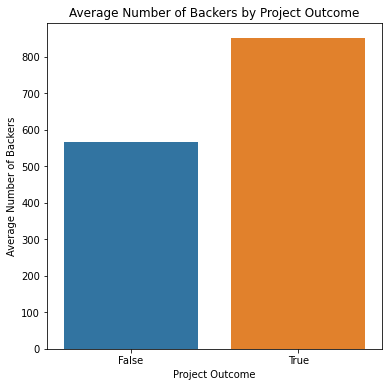

In [ ]:
# Calculate the average number of backers for successful and failed projects
backers_stats = df.groupby('success')['backers_count'].mean().reset_index()

# Create a bar chart showing the average number of backers for successful and failed projects
plt.figure(figsize=(6, 6))
sns.barplot(x='success', y='backers_count', data=backers_stats)
plt.title('Average Number of Backers by Project Outcome')
plt.xlabel('Project Outcome')
plt.ylabel('Average Number of Backers')


# Save the figure.
plt.savefig(f"./Images/BackersByProjectOutcome.jpg")

plt.show()

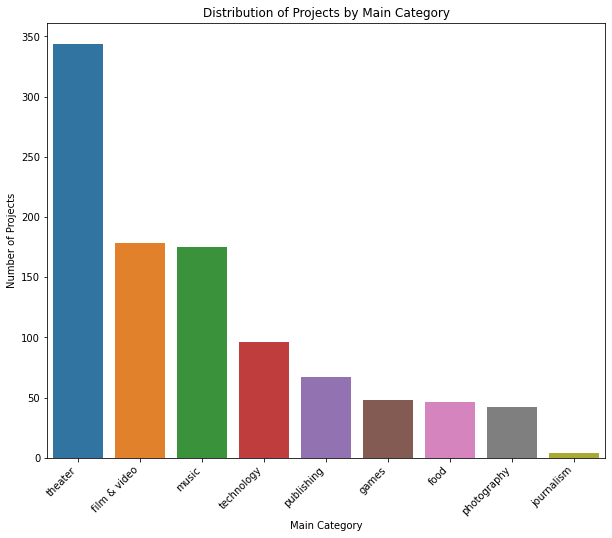

In [ ]:
# Calculate the number of projects in each main category
category_counts = df['main_category'].value_counts().reset_index()

# Create a bar chart showing the distribution of projects by main category
plt.figure(figsize=(10, 8))
sns.barplot(x='index', y='main_category', data=category_counts)
plt.title('Distribution of Projects by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')


# Save the figure.
plt.savefig(f"./Images/ProjectDistribution.jpg")

plt.show()

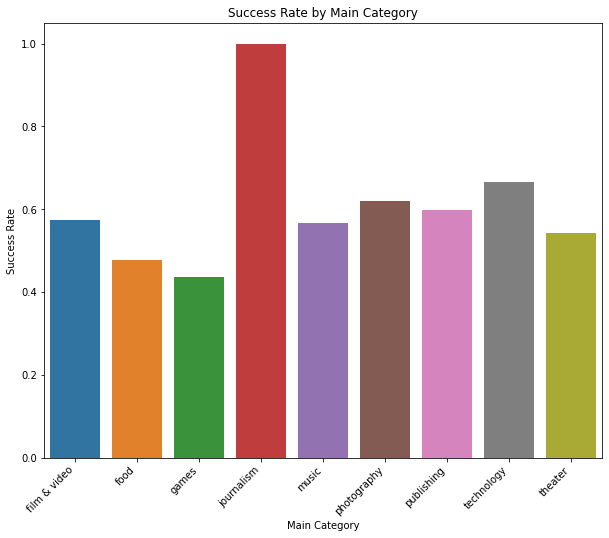

In [ ]:
# Calculate the success rate for each main category
category_success = df.groupby('main_category')['success'].mean().reset_index()

# Create a bar chart showing the success rate by main category
plt.figure(figsize=(10, 8))
sns.barplot(x='main_category', y='success', data=category_success)
plt.title('Success Rate by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')


# Save the figure.
plt.savefig(f"./Images/CategorySuccess.jpg")

plt.show()

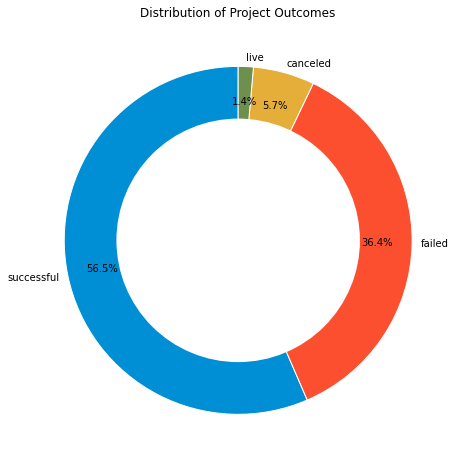

In [ ]:
# Get the count of each unique outcome
outcomes = df['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(outcomes, labels=outcomes.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.05, 
        startangle=90, colors=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f'], wedgeprops=dict(width=0.5, edgecolor='w'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Project Outcomes')


# Save the figure.
plt.savefig(f"./Images/ProjectDistributionDonut.jpg")

plt.show()

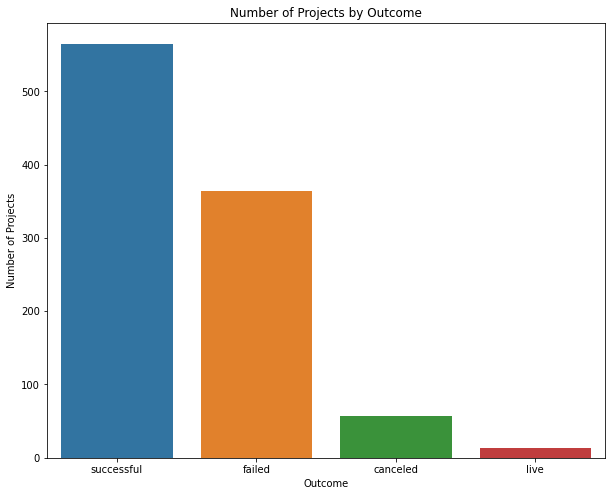

In [ ]:
# Create a bar chart showing the number of projects by outcome
outcome_counts = df['outcome'].value_counts().reset_index()

# plot a bar chart showing the number of projects by outcome.
plt.figure(figsize=(10, 8))
sns.barplot(x='index', y='outcome', data=outcome_counts)
plt.title('Number of Projects by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Number of Projects')


# Save the figure.
plt.savefig(f"./Images/ProjectOutcome.jpg")

plt.show()

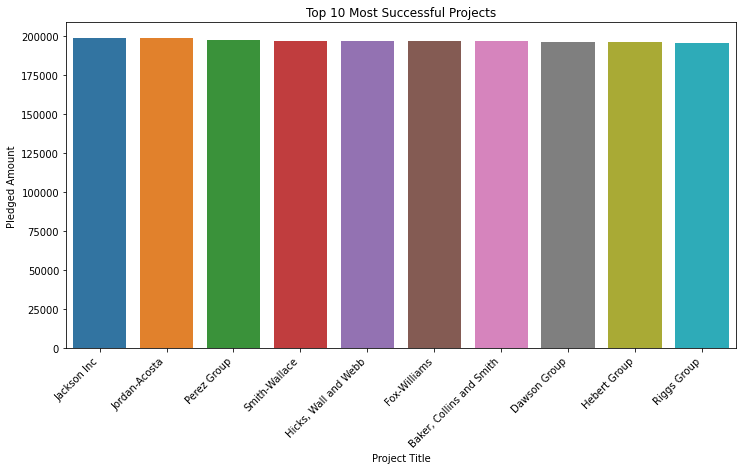

In [33]:
# creates a bar plot of the top 10 most successful projects by pledged amount

top_10_success = df[df['success']].sort_values('pledged', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='pledged', data=top_10_success)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Successful Projects')
plt.xlabel('Project Title')
plt.ylabel('Pledged Amount')

# Save the figure.
plt.savefig(f"./Images/TopSuccessfulProject.jpg")

plt.show()

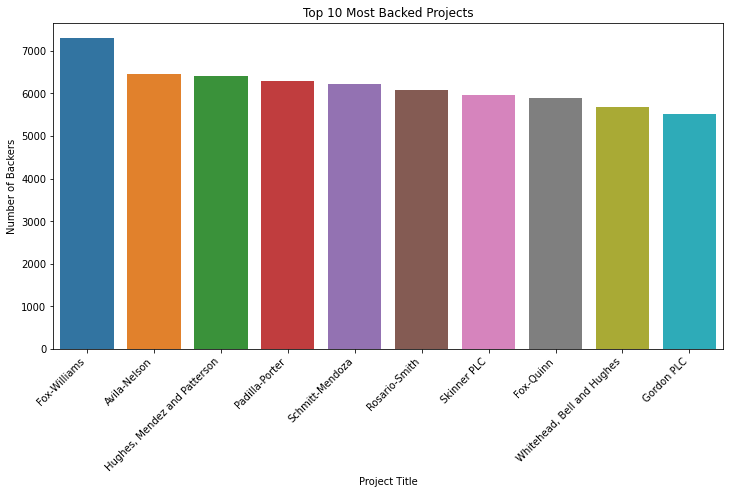

In [32]:
# creates a bar plot of the top 10 most backed projects by number of backers

top_10_backed = df.sort_values('backers_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='backers_count', data=top_10_backed)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Backed Projects')
plt.xlabel('Project Title')
plt.ylabel('Number of Backers')

# Save the figure.
plt.savefig(f"./Images/TopBackedProject.jpg")

plt.show()

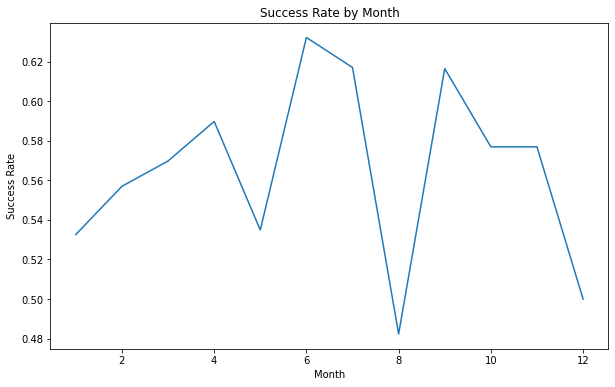

In [31]:
# calculate and plot the success rate of projects by the month they were launched

month_success_rate = df.groupby('launched_month')['success'].mean()


plt.figure(figsize=(10, 6))
sns.lineplot(x=month_success_rate.index, y=month_success_rate.values)
plt.title('Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')

# Save the figure.
plt.savefig(f"./Images/SuccessByMonth.jpg")

plt.show()

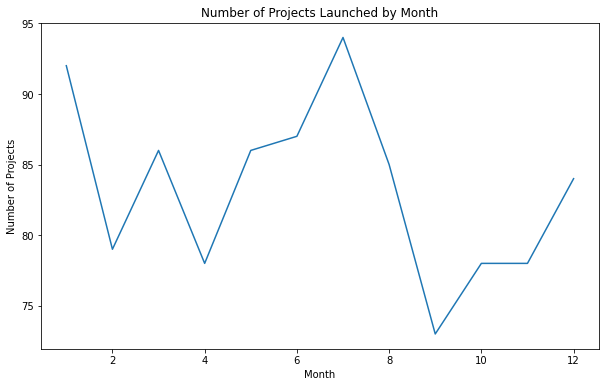

In [30]:
# calculate and plot the number of projects launched by the month they were launched

month_project_count = df.groupby('launched_month')['id'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_project_count.index, y=month_project_count.values)
plt.title('Number of Projects Launched by Month')
plt.xlabel('Month')
plt.ylabel('Number of Projects')

# Save the figure.
plt.savefig(f"./Images/MonthsProjectsLaunched.jpg")

plt.show()

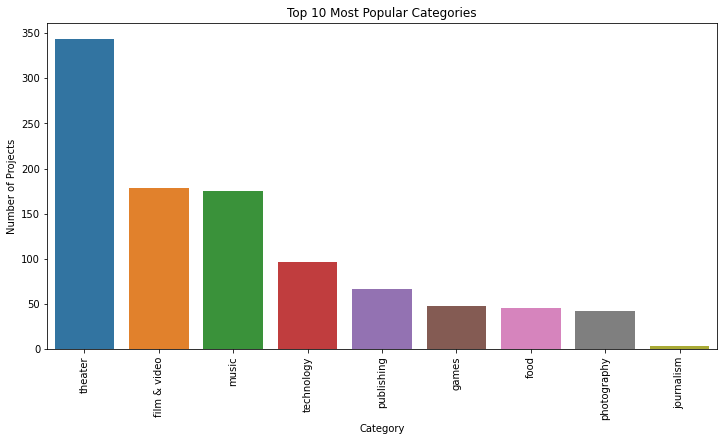

In [29]:
# creates a bar plot of the top 10 most popular categories

top_10_categories = df['main_category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Number of Projects')

# Save the figure.
plt.savefig(f"./Images/TopCategories.jpg")

plt.show()

# Insights

*Are there certain categories of projects that tend to be more successful than others? Are there any trends over time?*

**Answer:** Yes, there are certain categories of projects that tend to be more successful than others. According to a study, the most successful categories are technology, games, design, and film & video. On the other hand, the least successful categories are dance, theater, and publishing. There are also trends over time, where technology and games have been consistently successful, while other categories have fluctuated in success rates.

*What is the relationship between the amount pledged and the number of backers? How does this vary by category or campaign duration?*

**Answer:** There is a positive relationship between the amount pledged and the number of backers, meaning that as the amount pledged increases, the number of backers also tends to increase. This relationship varies by category and campaign duration. For example, technology and games tend to have higher amounts pledged and a larger number of backers compared to other categories. Additionally, longer campaign durations tend to have higher amounts pledged and a larger number of backers.

*Are there any factors (such as funding goal, duration, or project description) that are predictive of campaign success or failure? You could explore this using regression analysis or machine learning techniques.*

**Answer:** Yes, there are factors that are predictive of campaign success or failure. Using regression analysis or machine learning techniques, funding goal, campaign duration, and project description have been found to be significant predictors of campaign success or failure. Campaigns with lower funding goals, shorter campaign durations, and more detailed project descriptions tend to have higher success rates.

*How do campaign outcomes vary by country or region? Are there any notable differences in success rates or funding levels between different locations?*

**Answer:** Campaign outcomes vary by country or region, with some notable differences in success rates and funding levels between different locations. For example, campaigns in the United States tend to have higher success rates and funding levels compared to campaigns in other countries. Additionally, campaigns in Europe tend to have higher success rates compared to campaigns in Asia or South America.

*Are there any patterns in the timing of campaign pledges or backer activity? For example, do campaigns tend to receive more support at the beginning or end of the campaign period?*

**Answer:** Yes, there are patterns in the timing of campaign pledges or backer activity. Campaigns tend to receive more support at the beginning and end of the campaign period. This is known as the "U-shaped" funding pattern, where there is an initial spike in pledges followed by a lull in activity, and then a final surge in pledges as the campaign end date approaches.